# Homework 4


By Andrew Sos & Tim Keegan

# Introduction
In homework 4, we will be looking at interpolation of polynomials and curve fitting equations. We will preform a regression analysis so it creates a linear combination of hermite polynomails. Using input data, we will use the hermite polynomail matrix and create a regression analysis when m=3. Additionally, we will make an optimization model for a response surface for a given equation. Overall, This homework focuses on the preformance of regression and interpolation polynomails showing how they are applicable to a variety of equations in interpretations of data.

## Question 1

In this assignment, we are tasked with performing regression using the Hermite polynomials. 

Given the input data $\{x_k\}_{k=1}^n$ and $\{f_k = f(x_k)\}_{k=1}^n$, we must to find the coefficients $\{a_j\}_{j=1}^m$ such that the linear combination of [the Hermite polynomials]
$$
    \sum_{j=1}^{m} a_j H_{j-1}(x)
$$
 approximates the input data.  We are tasked with reformulating the least square error minimization in matrix form:


$$
    error^2 = \sum_{k=1}^n \left(\sum_{j=1}^m a_j H_{j - 1}(x_k) - f_k\right)^2 \to \min.
$$

Using the least squared error method with the hermite polynomail we would want the ( j-1) value of H
$$
\sum_{j=1}^m a_j H_{j-1}( x_{k})
$$

An a matrix with a of m
$$
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_m 
\end{pmatrix}
$$

and a f matching the n value which corresponds to the following matrix
$$
-\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_k 
\end{pmatrix}
$$

Combining all these matrices together based of the least squared error minimization would give the following matrix squared:

$$
error^2 = \left|
    \underbrace{\left\{\begin{pmatrix}
    1 & H_1(x_1) & H_2(x_1) & \ldots & H_{m-1}(x_1) \\
    1 & H_1(x_2) & H_2(x_2) & \ldots & H_{m-1}(x_2) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & H_1(x_n) & H_2(x_n) & \ldots & H_{m-1}(x_n) \\
\end{pmatrix}\right.}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_m 
\end{pmatrix}
-
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
\right|_2^2 \to \min,
$$

In [3]:

function poly_regression(x_given, f_given, m::Int, x_eval)
    
    # consistency check
    @assert length(x_given) == length(f_given)
    
    n = length(x_given)
    
    # Step 1: get matrix X
    X = ones(n, m)
    
    for j = 2:m
        X[:, j] = x_given .* X[:, j - 1]
        # this equivalent to
        # X[:, j] = x_given .^ (j - 1)
    end
        
    # Step 2: get a's
    a = X \ f_given
    
    println(a)
    
    # Step 3: Perform regression
    P = zeros(length(x_eval))
    
    x_evalʲ⁻¹ = ones(length(x_eval))
    
    for j = 1:m
        P += a[j] *  x_evalʲ⁻¹
        x_evalʲ⁻¹ .*= x_eval
    end
    
    return P
end

poly_regression (generic function with 1 method)

## Question 2

Using the input data from the class

In [13]:
using Random
Random.seed!(926491)

f_exact(x) = x ^ 2

x_given = range(-2, 2, 10)
f_given = f_exact.(x_given) + randn(length(x_given));

and the formulation obtained in the previous question, numericaly perform the regression with the Hermite polynomials with $m=3$ and visualize the results.

Using the the matrix code contained in question 1, we are able to visualize the values of the random data with the graph below. We are then further able to create a regression analysis of this graph with a m value of 3 which is shown below. This regression analysis shows the best fit line for this data.

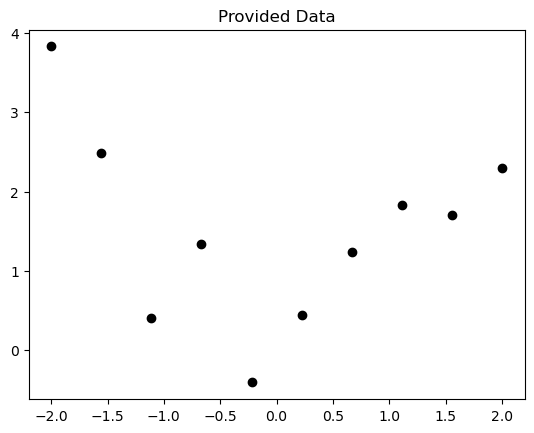

PyObject <matplotlib.collections.PathCollection object at 0x00000233C0A9EDA0>

In [17]:
title("Provided Data")
scatter(x_given, f_given,color="Black")

[0.42142829678736815, -0.1583274431119579, 0.6705629480370494]


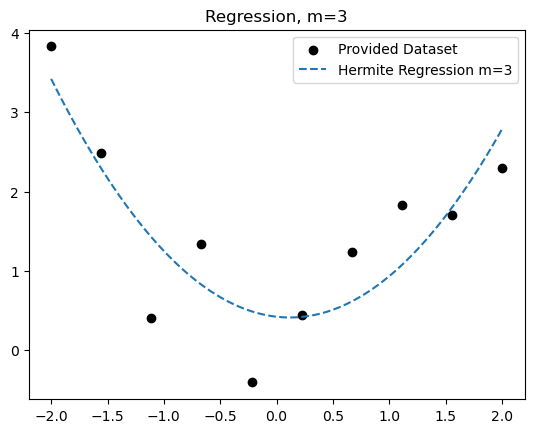

PyObject <matplotlib.legend.Legend object at 0x00000233C0962EC0>

In [15]:
using PyPlot
x_set=range(-2, 2, 100)
reg_vals=poly_regression(x_given, f_given, 3, x_set)
title("Regression, m=3")
scatter(x_given,f_given,label="Provided Dataset",color="Black")
plot(x_set,reg_vals,label="Hermite Regression m=3",linestyle="--")
legend()

## Question 3: extra credit for 3170, required for 6170

In this problem we generalize the polynomial regression to two dimensions. Assuming the input data is $\{(x_k, y_k)\}_{k=1}^n$ and $\{f_k\}_{k=1}^n$, we are tasked to find the quadratic polynomial in the variables $x$ and $y$, in matrix form.

$$
    f(x, y) = a_1 + x a_2 + y a_3 +  x ^2  a_4 + x y a_5 + y ^ 2 a_6,
$$

such that $f(x_k, y_k) \approx f_k$ in the least-squared error sense.

In this problem, we are tasked with creating the matrix form of the polynomial regression for a quadratic polynomial with two independent variables (x and y).  This is often referred to as the optimization model for response surface.  The general equation for this is the following:
$$
    f(x₁, x₂) \approx fₖ = a_{00} + x₁a_{10} + x₂ a_{01} +  x₁ ^2  a_{2 0} + x₁ x₂ a₁₂ + x₂ ^ 2 a_{0 2} + \epsilon,
$$
In this equation, x₁ and x₂ represent the two independent variables and $\epsilon$ represents the error in the approximation.

This can be represented by the following summation:
$$
    fₖ = aₒₒ + \sum_{i=1}^{m} a_i x_i + \sum_{i=1}^{m} aᵢᵢ x_i ^2 + \sum_{i=1}^{m-1} \sum_{j=i+1}^{m} aᵢⱼ x_i x_j + \epsilon 
$$
This can be approximated to the following where N represents the degree of polynomial:
$$
   fₐₚₚ = \sum_{i=0}^{N} \sum_{j=0}^{N} aᵢⱼ x₁^i x₂^j
$$
Applying our conditions, we obtain the following:
$$
    fₐₚₚ = \sum_{i=0}^{N} \sum_{j=0}^{N} aᵢⱼ x^i y^j
$$
This can be transformed to product form in the following equation:
$$
    fₐₚₚ = \bf X ^T A \bf X
$$
In this equation $$ \bf X = \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} $$

Also, $$ A = \begin{pmatrix} a_{0 0} & a_{0 1} & a_{0 2} \\ a_{1 0} & a_{1 1} & a₁₂ \\ a_{20} & a₂₁ & 0 \end{pmatrix} $$

This can therefore be combined to the following equation:
$$
    fₐₚₚ = (x, \ y, \ 1) * \begin{pmatrix} a_{0 0} & a_{0 1} & a_{0 2} \\ a_{1 0} & a₁₁ & a₁₂ \\ a_{2 0} & a₂₁ & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \\ 1 \end{pmatrix}
$$

This can then be applied to the following general error reducing formula:
$$ 
    error^2 = \sum_{k=1}^{n}\left\| fₐₚₚ₍ₖ₎-fₖ \right\| ^ 2 \to \min
$$
Therefore, the error minimizing formula is the following:
$$
error^2 =  \left\|  (x, \ y, \ 1) * \begin{pmatrix} aₒₒ & aₒ₁ & aₒ₂ \\ a₁ₒ & a₁₁ & a₁₂ \\ a₂ₒ & a₂₁ & 0 \end{pmatrix} * \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} - fₖ \right\|_2^2 \to \min
$$

## Conclusion

Overall, we were able to successfully create a matrix equation for a hermite polynomail. This matrix equation was further used to be analysed by a random data set. This random data set was plugged into the matrix equation and a regression analyses was preformed on it when m=3. Finally, an  optimization model for response surface was found for a polynomail and a matrix was derived in the least squared error sense. Overall, this homework showed the successful conduction of matrix creation and analyses using the least squared error method.